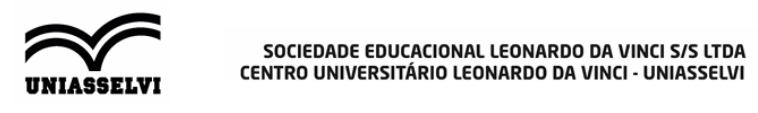

**Nome do Acadêmico:** Neemias Gonçalves Braga

**Matrícula:** 3019568

# Projeto II - Aplicação de Métodos de Aprendizagem de Máquina

>## Agrupamento do preço de combustíveis por regiões do Brasil

<p align="justify">
Frequentemente, não é possível utilizar tarefas de
aprendizado supervisionado, espcialmente, em casos onde os dados não estão previamente classificados ou não têm estrutura conhecida, o que impossibilita assim o treinamento. Nesses casos, podem ser utilizadas técnicas de aprendizado não supervisionado, como por exemplo, a clusterização, ou mais conhecida como agrupamento. Esta técnica consiste na separação dos dados em grupos (clusters, em inglês) que possuem características similares, baseando-se pelos valores dos atributos de entrada. No entanto, diferentemente da tarefa de classificação, no agrupamento não há definição ou rótulo dos grupos formadodos após a divisão, fica ao encargo do analista essa avaliação.

Conforme diferentes critérios, as técnicas de agrupamento podem ser separadas em 3 tipos, por: compactação, encadeamento ou separação espacial.

O K-Médias é um algoritmo do tipo particional e utiliza o critério de compactação que tem por objetivo a associação de objetos com pequena variação dentro do mesmo cluster e que busca, de forma iterativa, reduzir o erro quadrático médio dos agrupamentos.


>## Objetivo

Esse projeto tem como objetivo aplicar algoritmo de machine learning para agrupamento de preço de combustíveis por região do Brasil a partir de base de dados abertos disponibilizados pelo Ministério de Minas e Energia em site oficial do Governo Federal



>## Especificação Técnica

<p align="justify">

**Dataset:** Para desenvolvimento desse projeto, será utilizado dataset específico formado pelos dados semanais agrupados por semestre do ano de 2021. Os dados estão disponíveis em: < https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ >.

**Formato:** A base de dados está em formato CSV, estando divivido em 16 colunas (features) conforme segue: Regiao, Estado, Municipio, Revenda, CNPJ da Revenda, Nome da Rua, Numero Rua, Complemento, Bairro, Cep, Produto,Data da Coleta, Valor de Venda, Valor de Compra, Unidade de Medida, Bandeira          

As features utilizadas pelos métodos (treinamento e teste) são: Regiao, Estado, Municipio, Revenda, CNPJ da Revenda, Nome da Rua, Numero Rua, Complemento, Bairro, Cep, Produto,Data da Coleta, Valor de Venda, Valor de Compra, Unidade de Medida, Bandeira          

**DESCRIÇÃO DAS FEATURES:**
Regiao - Sigla    object
Estado - Sigla    object
Municipio         object
Revenda           object
CNPJ da Revenda   object
Nome da Rua       object
Numero Rua        object
Complemento       object
Bairro            object
Cep               object
Produto           object
Data da Coleta    object
Valor de Venda    object
Valor de Compra   float64
Unidade de Medida object
Bandeira          object

**Métodos de Pré-processamento:** O dataset necessita de um tratamento inicial dos dados. Sendo assim, destaca-se como os pré-processsamento os seguintes: Limpeza da base, onde serão renomeadas algumas colunas para melhor entendimento, colunas não utilizadas serão removidas, há também um tratamento para converter os dados em data ou em númerico para representar valor monetário.

**Tarefa de Aprendizado:** Será aplicado a tarefa de Agrupamento.

**Modos de aprendizado:** Não Supervisionado.

**Algoritmo Avaliado:** K-médias.

**Métrica utilizadas:** Score, Média Erro Absoluto e Média Erro Quadrático.

>## Pré-Processamento

Importação das bibliotecas


In [1]:
#importar biblioteca Pandas para leitura de arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import http.client
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import warnings
import requests
warnings.filterwarnings('ignore')

A fim de evitar problema no carregamento em função de protocolo


In [2]:
# Problema ao carregar a base por causa do protocolo
http.client.HTTPConnection._http_vsn = 10
http.client.HTTPConnection._http_vsn_str = 'HTTP/1.0'

Importar - conexão com o dataset.
Para conexão utiliza-se a biblioteca pandas com a função read_csv() resultado na saída um dataframe

In [3]:
url = r"https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2021-01.csv"

try:
    response = requests.get(url, timeout=60, stream=True) # Aumenta o timeout para 60 segundos
    response.raise_for_status() # Verifica se houve algum erro na requisição

    # Lendo o arquivo em pedaços para evitar sobrecarga de memória
    chunks = []
    for chunk in response.iter_content(chunk_size=1024*1024): # Lê em pedaços de 1MB
      if chunk:
        chunks.append(chunk)

    # Concatenando os pedaços e decodificando
    content = b''.join(chunks).decode('ISO-8859-1')

    # Usando StringIO para criar um objeto file-like a partir do conteúdo
    from io import StringIO
    tabela_t1 = pd.read_csv(StringIO(content), sep=";", nrows=80000)
    tabela_t1.rename(columns={"ï»¿Regiao - Sigla": "Regiao - Sigla"}, inplace=True)
    print("Arquivo carregado com sucesso!")

except requests.exceptions.RequestException as e:
    print("Erro na requisição:", e)

Arquivo carregado com sucesso!


In [4]:
url = r"https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsas/ca/ca-2021-02.csv"

try:
    response = requests.get(url, timeout=60, stream=True) # Aumenta o timeout para 60 segundos
    response.raise_for_status() # Verifica se houve algum erro na requisição

     # Lendo o arquivo em pedaços para evitar sobrecarga de memória
    chunks = []
    for chunk in response.iter_content(chunk_size=1024*1024): # Lê em pedaços de 1MB
      if chunk:
        chunks.append(chunk)

    # Concatenando os pedaços e decodificando
    content = b''.join(chunks).decode('ISO-8859-1')

    # Usando StringIO para criar um objeto file-like a partir do conteúdo
    from io import StringIO
    tabela_t2 = pd.read_csv(StringIO(content), sep=";", nrows=80000)
    tabela_t2.rename(columns={"ï»¿Regiao - Sigla": "Regiao - Sigla"}, inplace=True)
    print("Arquivo carregado com sucesso!")

except requests.exceptions.RequestException as e:
    print("Erro na requisição:", e)

KeyboardInterrupt: 

In [ ]:
# Concatenando os arquivos para formar base de análise com período anual
tabela = pd.concat([tabela_t1, tabela_t2])

In [ ]:
# Visualizando informações da Tabela
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 160000 entries, 0 to 79999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     160000 non-null  object 
 1   Estado - Sigla     160000 non-null  object 
 2   Municipio          160000 non-null  object 
 3   Revenda            160000 non-null  object 
 4   CNPJ da Revenda    160000 non-null  object 
 5   Nome da Rua        160000 non-null  object 
 6   Numero Rua         159933 non-null  object 
 7   Complemento        32431 non-null   object 
 8   Bairro             159637 non-null  object 
 9   Cep                160000 non-null  object 
 10  Produto            160000 non-null  object 
 11  Data da Coleta     160000 non-null  object 
 12  Valor de Venda     160000 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  160000 non-null  object 
 15  Bandeira           160000 non-null  object 
dtypes: float

Aplicar os métodos de pré-processamento:

Limpeza da base, onde serão renomeadas algumas colunas para melhor entendimento, colunas não utilizadas serão removidas, há também um tratamento para converter os dados em data ou em númerico para representar valor monetário.


In [ ]:
# Renomear coluna
tabela.rename(columns={"ï»¿Regiao - Sigla": "Regiao - Sigla"}, inplace=True)

# Removendo colunas não usadas
tabela = tabela.drop(["CNPJ da Revenda", "Nome da Rua", "Numero Rua", "Complemento", "Bairro", "Unidade de Medida", "Valor de Compra"], axis=1)

# Remove as COLUNAS com todos os dados NA
tabela = tabela.dropna(axis=1)

# Remove as Linhas com todos os dados NA
tabela = tabela.dropna(axis=0)

# Removendo linhas de Gas Natural por ser medida diferente na unidade e não haver as quantidades e não será usada
tabela = tabela.drop(tabela.loc[tabela["Produto"]=="GNV"].index)

# Substitui , por . e memoriza na "tabela"
tabela["Valor de Venda"] = tabela["Valor de Venda"].apply(lambda x: str(x).replace(",", ".") )

# Converte o formato para ano-mes-dia
tabela["Data da Coleta"] = pd.to_datetime(tabela["Data da Coleta"], dayfirst=True)

# Converte o formato para numerico
tabela["Valor de Venda"] = pd.to_numeric(tabela["Valor de Venda"])

# Substitui - por "" e memoriza na "tabela"
tabela["Cep"] = tabela["Cep"].apply(lambda x: str(x).replace("-", "") )
tabela["Cep"] = pd.to_numeric(tabela["Cep"])

#Verificando Qtds
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153302 entries, 0 to 79999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Regiao - Sigla  153302 non-null  object        
 1   Estado - Sigla  153302 non-null  object        
 2   Municipio       153302 non-null  object        
 3   Revenda         153302 non-null  object        
 4   Cep             153302 non-null  int64         
 5   Produto         153302 non-null  object        
 6   Data da Coleta  153302 non-null  datetime64[ns]
 7   Valor de Venda  153302 non-null  float64       
 8   Bandeira        153302 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 11.7+ MB


## Insights da base de dados
Gera um resumo da base para fazer uma análise dos dados contidos e suas relações




In [ ]:
# Separando dia em coluna distinta
tabela["Dia Coleta"] = tabela["Data da Coleta"].apply(lambda x: str(x)[8:10])

# Converte o formato para numerico
tabela["Dia Coleta"] = pd.to_numeric(tabela["Dia Coleta"])

# Incluindo coluna dom dia da semana
tabela["Dia Semana"] = tabela["Data da Coleta"].dt.dayofweek

# Incluindo coluna dom dia do mes
tabela["Dia Mes"] = tabela["Data da Coleta"].dt.month

#display(tabela)
tabela.info()


<class 'pandas.core.frame.DataFrame'>
Index: 153302 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Regiao - Sigla  153302 non-null  object        
 1   Estado - Sigla  153302 non-null  object        
 2   Municipio       153302 non-null  object        
 3   Revenda         153302 non-null  object        
 4   Cep             153302 non-null  int64         
 5   Produto         153302 non-null  object        
 6   Data da Coleta  153302 non-null  datetime64[ns]
 7   Valor de Venda  153302 non-null  float64       
 8   Bandeira        153302 non-null  object        
 9   Dia Coleta      153302 non-null  int64         
 10  Dia Semana      153302 non-null  int32         
 11  Dia Mes         153302 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 14.0+ MB


In [ ]:
# Duplicando colunas para layouts e acompanhamento das conversões
tabela["UF"] = tabela["Estado - Sigla"]
tabela["Regiao"] = tabela["Regiao - Sigla"]
tabela["Cidade"] = tabela["Municipio"]
tabela["Produto2"] = tabela["Produto"]
tabela["Bandeira2"] = tabela["Bandeira"]

tabela.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Cep,Produto,Data da Coleta,Valor de Venda,Bandeira,Dia Coleta,Dia Semana,Dia Mes,UF,Regiao,Cidade,Produto2,Bandeira2
0,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,93048000,GASOLINA,2021-01-01,4.599,BRANCA,1,4,1,RS,S,SAO LEOPOLDO,GASOLINA,BRANCA
1,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,93048000,ETANOL,2021-01-01,4.199,BRANCA,1,4,1,RS,S,SAO LEOPOLDO,ETANOL,BRANCA
2,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,93048000,GASOLINA ADITIVADA,2021-01-01,4.799,BRANCA,1,4,1,RS,S,SAO LEOPOLDO,GASOLINA ADITIVADA,BRANCA
3,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,93048000,DIESEL,2021-01-01,3.499,BRANCA,1,4,1,RS,S,SAO LEOPOLDO,DIESEL,BRANCA
4,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,93048000,DIESEL S10,2021-01-01,3.599,BRANCA,1,4,1,RS,S,SAO LEOPOLDO,DIESEL S10,BRANCA


## 3 - Analise dos dados


In [ ]:
# Contagem por Produto
print(tabela["Produto2"].value_counts().sort_values(ascending=False))

Produto2
GASOLINA              39654
ETANOL                35529
DIESEL S10            31899
GASOLINA ADITIVADA    29675
DIESEL                16545
Name: count, dtype: int64


In [ ]:
# Contagem por REGIAO
print(tabela["Regiao"].value_counts().sort_values(ascending=False))

Regiao
SE    73805
NE    30834
S     26346
CO    12627
N      9690
Name: count, dtype: int64


In [ ]:
# Mostra um resumo de soma, média, etc da tabela
print(tabela["Valor de Venda"].describe())

count    153302.000000
mean          4.685785
std           0.849498
min           2.050000
25%           3.999000
50%           4.620000
75%           5.299000
max           7.097000
Name: Valor de Venda, dtype: float64


Regiao
CO    Axes(0.125,0.11;0.775x0.77)
N     Axes(0.125,0.11;0.775x0.77)
NE    Axes(0.125,0.11;0.775x0.77)
S     Axes(0.125,0.11;0.775x0.77)
SE    Axes(0.125,0.11;0.775x0.77)
Name: Valor de Venda, dtype: object

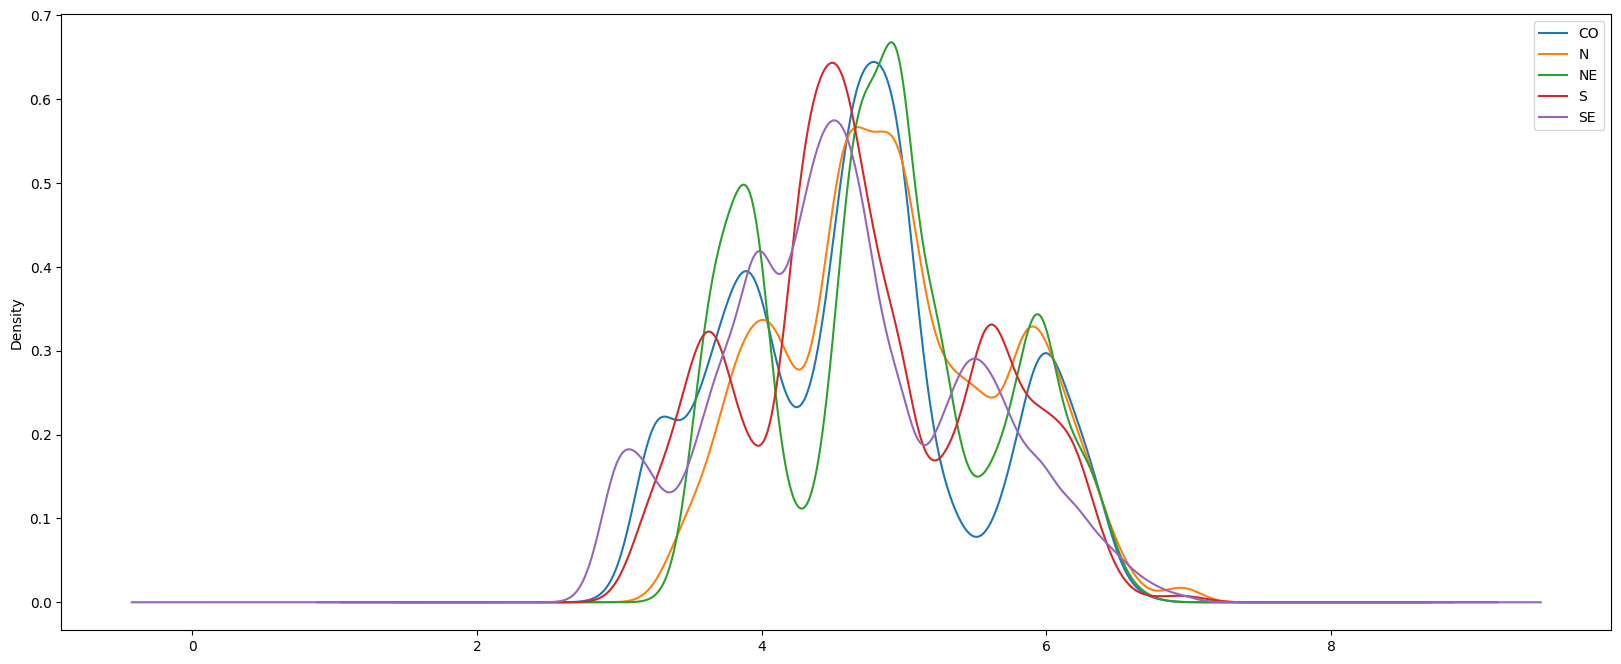

In [ ]:
# Gráfico Agrupado por Região
tabela.groupby('Regiao')['Valor de Venda'].plot(figsize=(20,8), legend=True, kind="density")

Produto2
DIESEL                Axes(0.125,0.11;0.775x0.77)
DIESEL S10            Axes(0.125,0.11;0.775x0.77)
ETANOL                Axes(0.125,0.11;0.775x0.77)
GASOLINA              Axes(0.125,0.11;0.775x0.77)
GASOLINA ADITIVADA    Axes(0.125,0.11;0.775x0.77)
Name: Valor de Venda, dtype: object

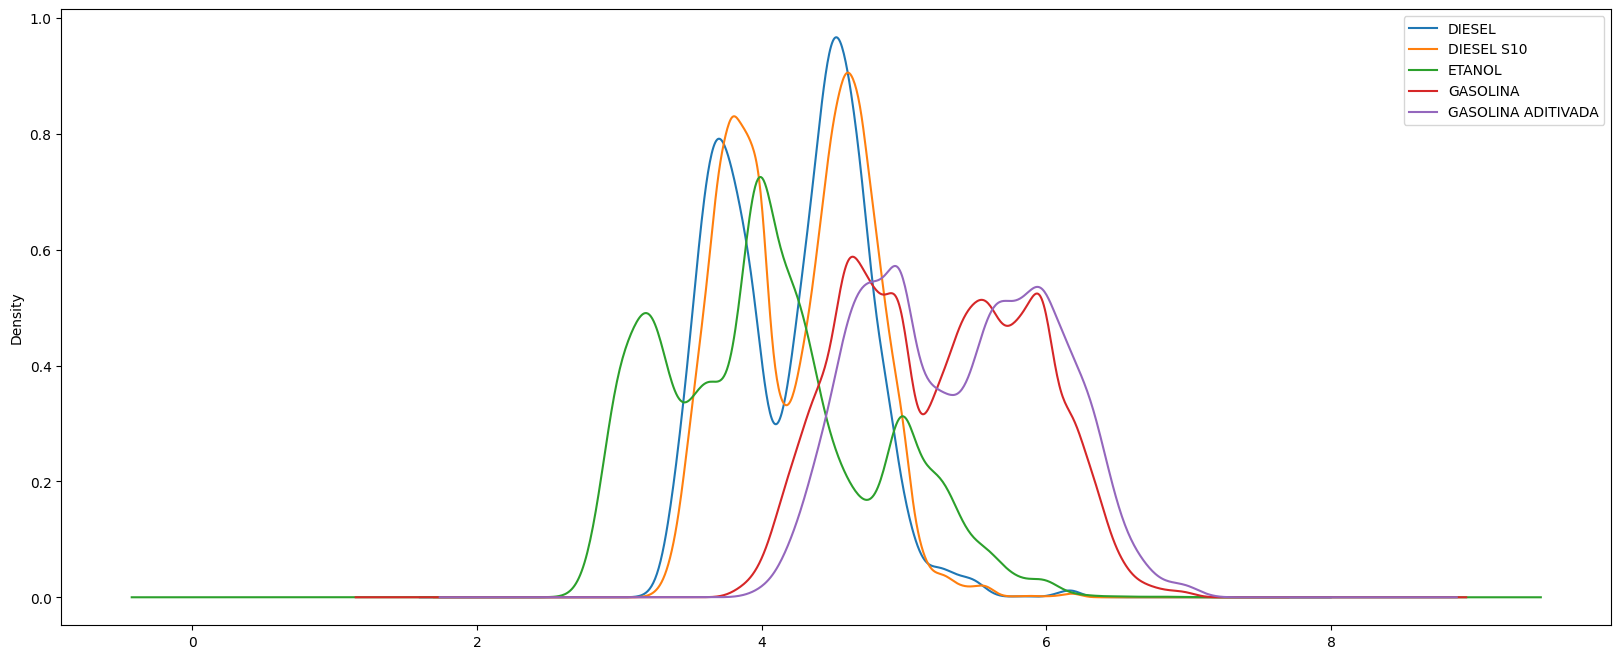

In [ ]:
# Gráfico Agrupado por Produto
tabela.groupby('Produto2')['Valor de Venda'].plot(figsize=(20,8), legend=True, kind="density")

<Axes: xlabel='UF', ylabel='Valor de Venda'>

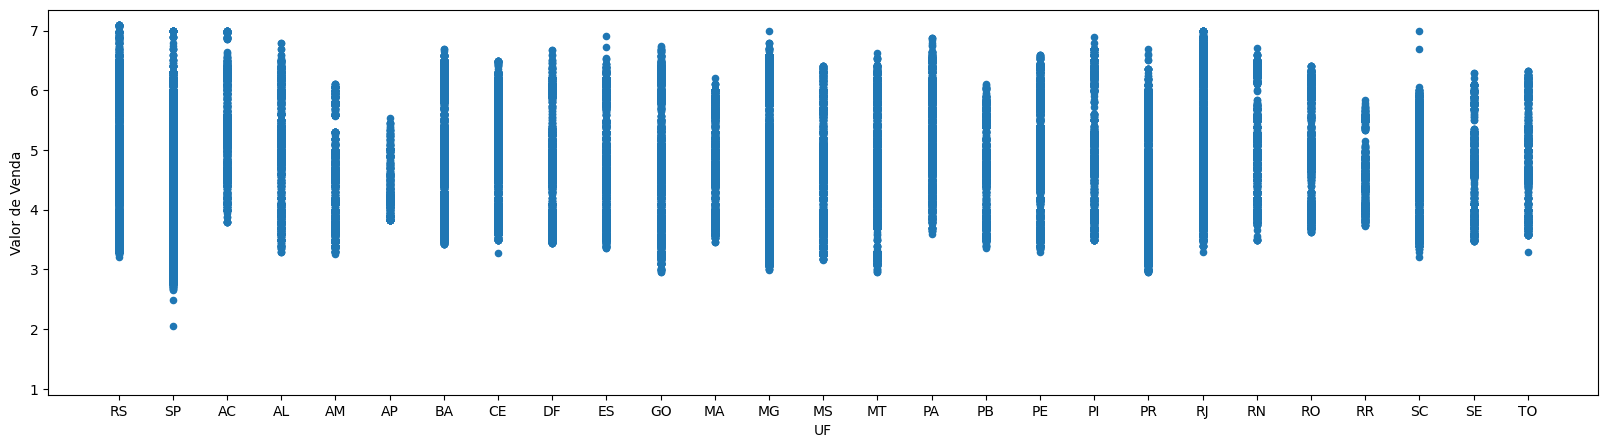

In [ ]:
# Gráfico da Variação do Valor de Venda por UF
var = "UF"
data = pd.concat([tabela["Valor de Venda"], tabela[var]], axis=1)
data.plot.scatter(x=var, y="Valor de Venda", ylim=(0.900000), figsize=(20,5))

(-0.5, 26.5, 0.0, 11.0)

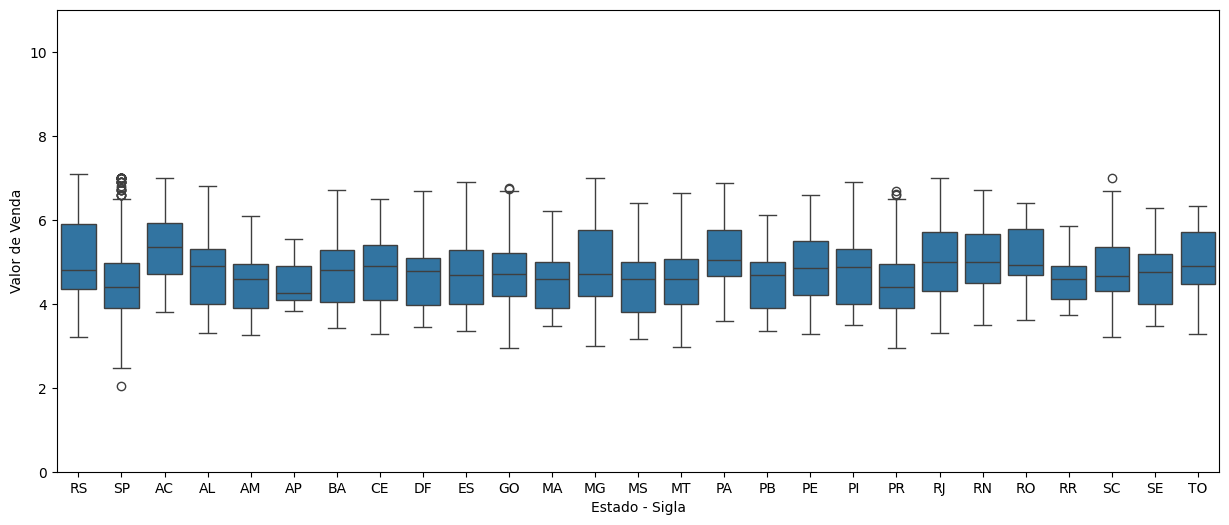

In [ ]:
# Gráfico boxplot para identificar outliers e discrepâncias
var = "Estado - Sigla"
data = pd.concat([tabela["Valor de Venda"], tabela[var]], axis=1)
f, ax = plt.subplots(figsize=(15,6))
fig = sns.boxplot(x=var, y="Valor de Venda", data=data)
fig.axis(ymin=0, ymax=11)

In [ ]:
import pandas as pd

# Verificando se há colunas numéricas
non_numeric_cols = tabela.select_dtypes(include=["object"]).columns

# Exibindo as colunas numéricas
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda', 'Produto',
       'Bandeira', 'UF', 'Regiao', 'Cidade', 'Produto2', 'Bandeira2'],
      dtype='object')


In [ ]:
# Gráficos com varios modelos do resumo dos dados agrupados por Produto
sns.pairplot(tabela, hue="Produto2")

## 4 - Modelagem dos Dados analisados
Nesta etapa, para transformar dados Categóricos em Numéricos testei a utilização de One Hot Encoder e Ordinal Encoder

In [ ]:
#importanto biblioteca para transformar categoricas em variavel

import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder, OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from collections import Counter


In [ ]:
# Abrindo a variavel objetc Produtos em colunas de variáveis numéricas
one_hot_enc = OneHotEncoder(cols=["Produto"])
tabela_ohe = one_hot_enc.fit_transform(tabela)

In [ ]:
# Aplicando o Ordinal Encoder nas demais colunas
ordinal_enc = OrdinalEncoder(cols=["Revenda", "Regiao - Sigla", "Cep", "Estado - Sigla", "Municipio", "Bandeira"])
tabela_ord = ordinal_enc.fit_transform(tabela_ohe)

tabela_ord.head()

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Abrindo a variavel objetc Produtos em colunas de variáveis numéricas
one_hot_enc = OneHotEncoder(cols=["Produto"])
tabela_ohe = one_hot_enc.fit_transform(tabela)

# Aplicando o Ordinal Encoder nas demais colunas
ordinal_enc = OrdinalEncoder(cols=["Revenda", "Regiao - Sigla", "Cep", "Estado - Sigla", "Municipio", "Bandeira"])
tabela_ord = ordinal_enc.fit_transform(tabela_ohe)

tabela_ord.head()

# Seleção de features
# Removing 'Produto' from the list as it has been one-hot encoded
unneeded_columns = ['Regiao - Sigla', 'Estado - Sigla', 'UF', 'Revenda', 'Regiao', 'Cidade', 'Municipio',
                     'Data da Coleta', 'Bandeira', 'Bandeira2', 'Produto2']

# Assuming 'tabela_ord' from the previous step is the encoded table
tabela_final = tabela_ord.drop(unneeded_columns, axis=1)  # Use the result of the encoding

# Separar variáveis preditoras e target
X = tabela_final.drop('Valor de Venda', axis=1)
y = tabela_final['Valor de Venda']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ignorar warnings
warnings.filterwarnings('ignore')

# 5 - Modelo

In [ ]:
# Import necessary modules for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# importar scikit-learn para modelos
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.cluster import KMeans



In [ ]:
# Tratando Colunas Desnecessárias para aplicação do modelo
unneeded_columns = ['Regiao - Sigla', 'Estado - Sigla', 'UF', 'Revenda', 'Regiao', 'Cidade', 'Municipio', 'Produto', 'Data da Coleta', 'Bandeira', 'Bandeira2', 'Produto2']
tabela = tabela.drop(unneeded_columns, axis=1)

In [ ]:
tabela

In [ ]:
# Ignorar Alertas
warnings.filterwarnings('ignore')

In [ ]:
# Configurando o modelo para utilização de 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
X = np.array(tabela.drop('Valor de Venda', axis=1))
kmeans.fit(X)
tabela['K-Classes'] = kmeans.labels_

In [ ]:
X

In [ ]:
kmeans.fit(X)

In [ ]:
kmeans.labels_

In [ ]:
tabela

In [ ]:
# Exibindo o gráfico com as informações originais
sns.pairplot(tabela, hue='Valor de Venda')

In [ ]:
# Exibindo e comparando o gráfico KMeans com as informações originais
sns.pairplot(tabela, hue='K-Classes')

In [ ]:
# Método do Cotovelo
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=13, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Treinamento e Avaliação dos Modelos
## Agora, vamos treinar e avaliar os modelos de Regressão Linear, Random Forest e Gradient Boosting.

In [ ]:
# Inicialização dos modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Treinamento e avaliação dos modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}

# Exibindo os resultados
for model, result in results.items():
    print(f"Modelo: {model}")
    print(f"MSE: {result['MSE']}")
    print(f"R² Score: {result['R2']}")
    print("---------------------")

# 6 - Treino/Teste:

## Vamos utilizar a técnica de Treino/Teste para avaliar os modelos de Machine Learning. Isso envolve dividir os dados em conjuntos de treinamento e teste, onde o modelo é treinado com o conjunto de treinamento e avaliado com o conjunto de teste para verificar o desempenho.

## Treino/Teste:
## Dividiremos os dados em 80% para treinamento e 20% para teste.

In [ ]:
from sklearn.model_selection import train_test_split

# Separando as features (X) e o target (y)
X = tabela.drop('Valor de Venda', axis=1)
y = tabela['Valor de Venda']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando o tamanho dos conjuntos de dados
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

# 7- Cross Validation:
## Para avaliação mais robusta do modelo, utilizaremos a validação cruzada (Cross Validation), especificamente a estratégia de K-Fold Cross Validation, que divide os dados em k partes e utiliza k-1 partes para treinamento e 1 parte para validação, repetindo o processo k vezes.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor  # Importe o modelo GradientBoostingRegressor

# Inicializando GradientBoostingRegressor
model = GradientBoostingRegressor()

# Função para realizar a validação cruzada e imprimir o resultado
def perform_cross_validation(model, X, y, cv=5, scoring='accuracy'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    print(f"Cross Validation {scoring} Scores: {scores}")
    print(f"Média: {scores.mean()}, Desvio Padrão: {scores.std()}")

# Exemplo de uso
perform_cross_validation(model, X_train, y_train, cv=5, scoring='r2')

##Conclusão

###Com base na análise dos dados de vendas de combustíveis do ano de 2021, realizada utilizando técnicas de pré-processamento, visualização e análise de clusters, várias insights foram obtidas:

###  1- Perfil de Vendas: As vendas foram analisadas por produto e região, revelando padrões de consumo e distribuição.

###  2- Limpeza de Dados: Foram aplicadas várias etapas de limpeza de dados, incluindo remoção de valores ausentes e padronização de formatos.

###  3- Identificação de Outliers: Utilizando gráficos de caixa (boxplot), foi possível identificar outliers e discrepâncias nos dados.

###  4- Análise de Clusters: Por meio do algoritmo KMeans, os dados foram agrupados em clusters, revelando padrões e segmentos de mercado.

###  5- Determinação do Número Ideal de Clusters: O método do cotovelo foi utilizado para determinar o número ideal de clusters, auxiliando na interpretação dos resultados.

###  6- Realizado treinamento e avaliação nos modelos Regressão Linear, Random Forest e Gradient Boosting, onde o Random Forest obteve a melhor performance MSE: 0.052 e R² Score: 0.92.

###  7- Efetuado cross validation utilizando a estratégia de K-Fold Cross Validation.


### Essas análises fornecem insights valiosos para a compreensão do comportamento do mercado de combustíveis e podem orientar estratégias futuras de negócios e na tomada de decisão.

## Referencias:

### Latex: https://upmath.me/
### Pandas: https://www.geeksforgeeks.org/)python-creating-a-pandas-dataframe-column-based-on-a-given-condition/
###Pandas: https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/
### Information about LPG: http://www.gasmig.com.br/GasNatural/Paginas/Tabela-de-Conversao.aspx
###Vizualization Photly: https://plot.ly/python/